<a href="https://colab.research.google.com/github/adibhosn/deep_learning_implementations/blob/main/CNN_Monitory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt




In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape, y_test.shape

((60000, 28, 28), (10000,))

Text(0.5, 1.0, 'classe 5')

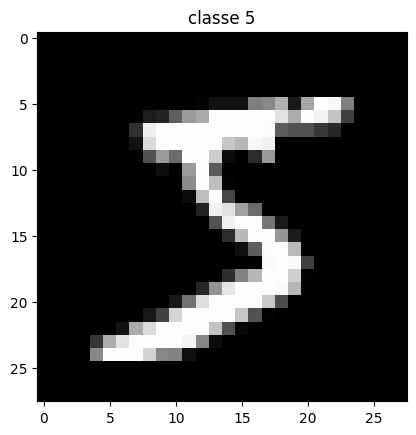

In [ ]:
plt.imshow(X_train[0], cmap = 'gray')
plt.title(f'classe {str(y_train[0])}')

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

In [ ]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
from numpy import float64

np.float64(X_train)
np.float64(X_test)

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [ ]:
X_test = X_test.astype(np.float64) / 255.0
X_train = X_train.astype(np.float64) / 255.0

In [ ]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
neural_network = Sequential()
neural_network.add(InputLayer(shape = (28, 28, 1)))
neural_network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
neural_network.add(MaxPooling2D(pool_size = (2,2)))
neural_network.add(Flatten())
neural_network.add(Dense(units=128, activation='relu'))
neural_network.add(Dense(units = 10, activation='softmax'))

In [ ]:
neural_network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
neural_network.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

neural_network.fit(X_train, y_train, batch_size=128, epochs = 5, validation_data=(X_test, y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 67ms/step - accuracy: 0.8821 - loss: 0.4268 - val_accuracy: 0.9724 - val_loss: 0.0911
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.9773 - loss: 0.0786 - val_accuracy: 0.9812 - val_loss: 0.0602
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 65ms/step - accuracy: 0.9861 - loss: 0.0492 - val_accuracy: 0.9837 - val_loss: 0.0484
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.9891 - loss: 0.0357 - val_accuracy: 0.9847 - val_loss: 0.0443
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 62ms/step - accuracy: 0.9921 - loss: 0.0267 - val_accuracy: 0.9814 - val_loss: 0.0529
